# [ K-means 알고리즘 ]
- 군집 중심점(centroid)이라는 특정 임의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 

K-means의 장점
1. 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
2. 쉽고 간결하다.

K-means의 단점
1. 거리 기반 알고리즘 : 속성의 개수가 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA로 차원축소를 적용해야할 가능성)
2. 반복을 수행 : 반복 횟수가 많을 경우 수행 시간이 느려진다.
3. 몇 개의 군집(cluster)을 선택해야할지 정하기 어렵다.

## 사이킷런 Kmeans 클래스 

In [ ]:
from sklearn.cluster import KMeans

---

## Exercise : K-means를 이용한 붓꽃 데이터 세트 군집화
- 참고 : 파이썬 머신러닝 완벽 가이드

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmeans.fit(iris_df) 

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
# iris_df의 각 데이터가 어떤 중심에 속하는지 확인 
# 0, 1, 2는 각각 첫번째, 두번째, 세번째 군집에 속함을 의미
print(kmeans.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### 실제 붓꽃 품종 분류 값과 얼마나 차이나는지 확인 
- 군집화가 효과적으로 됐는지 확인
- clust

In [5]:
iris_df["target"] = iris.target # 실제 분류값
iris_df["cluster"] = kmeans.labels_ # 군집화 분류값

iris_result = iris_df.groupby(["target", "cluster"])["sepal_length"].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 군집화 결과 시각화
- iris data 속성이 4개 이므로 2차원 평면상에 나타내기 적합하지 않음. 따라서 PCA로 속성 4개 -> 2개 차원 축소

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
# pca_transformed 

iris_df["pca_x"] = pca_transformed[:,0] # PCA 변환된 데이터의 첫번째 칼럼. x 좌표값
iris_df["pca_y"] = pca_transformed[:,1] # PCA 변환된 데이터의 첫번째 칼럼. y 좌표값
iris_df.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


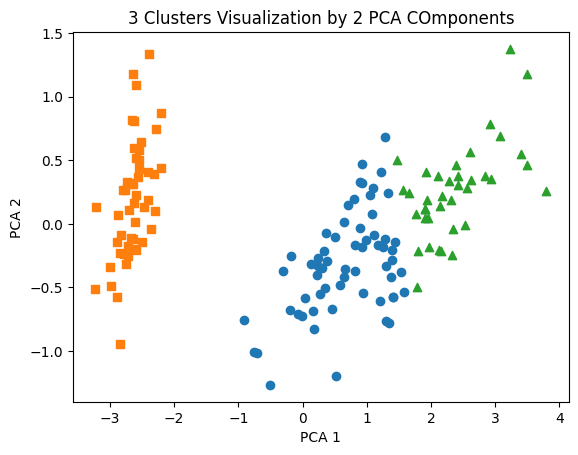

In [15]:
# 군집값이 0, 1, 2인 경우마다 별도 인덱스 추출
marker0 = iris_df[iris_df["cluster"]==0].index
marker1 = iris_df[iris_df["cluster"]==1].index
marker2 = iris_df[iris_df["cluster"]==2].index

# 왜 x,y 형태 marker 필요?
plt.scatter(x=iris_df.loc[marker0, "pca_x"], y=iris_df.loc[marker0, "pca_y"], marker="o") 
plt.scatter(x=iris_df.loc[marker1, "pca_x"], y=iris_df.loc[marker1, "pca_y"], marker="s") # 군집 1 : square 네모
plt.scatter(x=iris_df.loc[marker2, "pca_x"], y=iris_df.loc[marker2, "pca_y"], marker="^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show()

---

## Exercise 
- 참고 : 핸즈온 머신러닝

### 데이터 생성

In [3]:
from sklearn.datasets import make_blobs # 군집화 알고리즘 테스트를 위한 데이터 생성
import numpy as np

# 개별 군집 중심점의 좌표
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

# 군집별 서로 다른 표준편차 
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers= blob_centers,
                  cluster_std = blob_std, random_state=7)

### 그래프 

In [8]:
import matplotlib.pyplot as plt

In [11]:
def plot_clusters(X, y=None) :
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1) # c : 마커 color, s: 마커 size
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x2$", fontsize=14, rotation=0)

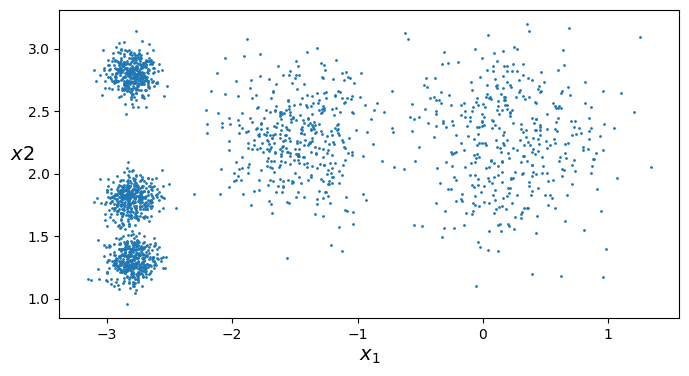

In [12]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

## 훈련과 예측
- 클러스터 중심(centroid)을 찾고 각 샘플을 가까운 클러스터에 할당

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42) # 각 샘플은 5개의 클러스터 중 하나에 할당
y_pred = kmeans.fit_predict(X) # fit_predict와 fit의 차이는 뭐지? kmeans.fit(X)
y_pred

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 1, ..., 2, 1, 0])

In [18]:
y_pred is kmeans.labels_  

True

- 군집은 비지도 학습라는 것 기억 !
- 여기서 label(레이블)은 분류의 레이블과 다름. <u>"알고리즘이 샘플에 할당한 클러스터의 인덱스"</u>

In [19]:
# 센트로이드(클러스터 중심) 찾기
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [23]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]]) # 새로운 샘플 -> 가장 가까운 센트로이드 클러스터 할당
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [24]:
kmeans.transform(X_new) # 샘플과 각 센트로이드 사이의 거리 반환

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

## 센트로이드 초기화 방법
- k-means 알고리즘이 수렴하는 것이 보장되나, 적절한 솔루션으로 수렴하지 못할 수 있음(지역 최적점으로 수렴)  
    -> 이는 센트로이드 초기화에 달려있음 !
### 이너셔(intertia) 
- 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리


- K-means ++ 알고리즘

In [26]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [27]:
kmeans.score(X) # score() 메서드는 이너셔의 음수값을 반환. 예측기의 score() 메서드는 사이킷런의 '큰 값이 좋은 값' 규칙을 따라야 하므로

-211.59853725816836

## 최적의 클러스터 개수(k) 찾기 
- 무조건 가장 작은 이너셔를 가지는 k? -> k가 커질수록 이너셔는 작아지기 때문에 좋은 방법은 아님.
- 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 됨

### 1. 엘보(elbow) 이용
- 엘보 : 이너셔 그래프를 k(클러스터 개수)의 함수로 그렸을 때 그래프가 꺽이는 지점

### 2. 실루엣 점수 이용
- 실루엣 점수 : 모든 샘플에 대한 실루엣 계수(silhouette coefficient)의 평균
- 함 샘플의 실루엣 계수 : $(b - a)/\max(a, b)$